# User manual and reference guide

Go through this [BNC2014 user manual](http://corpora.lancs.ac.uk/bnc2014/doc/BNC2014manual.pdf) before the parsing the XML file.


## Install and load packages

In [1]:
# !pip install altair
# !pip install lxml

In [2]:
import os
import random
from collections import defaultdict
from pprint import pprint

import numpy as np
import pandas as pd

from lxml import etree

import altair as alt

# Import the downloaded BNC 2014 directory

In [3]:
# tagged directory included words with POS tagging; whereas untagged directory does not have POS tagging.
# change to your directory path
path = 'Dataset'  # Ensure this is the correct path to your dataset
dir_corpus = os.path.join(path, 'spoken', 'tagged')
dir_meta = os.path.join(path, 'spoken', 'metadata')

# Print paths to verify correctness
print(f"Corpus Directory: {dir_corpus}")
print(f"Metadata Directory: {dir_meta}")

Corpus Directory: Dataset\spoken\tagged
Metadata Directory: Dataset\spoken\metadata


# Load and parse XML

Each XML file will have text with several utterances and words.
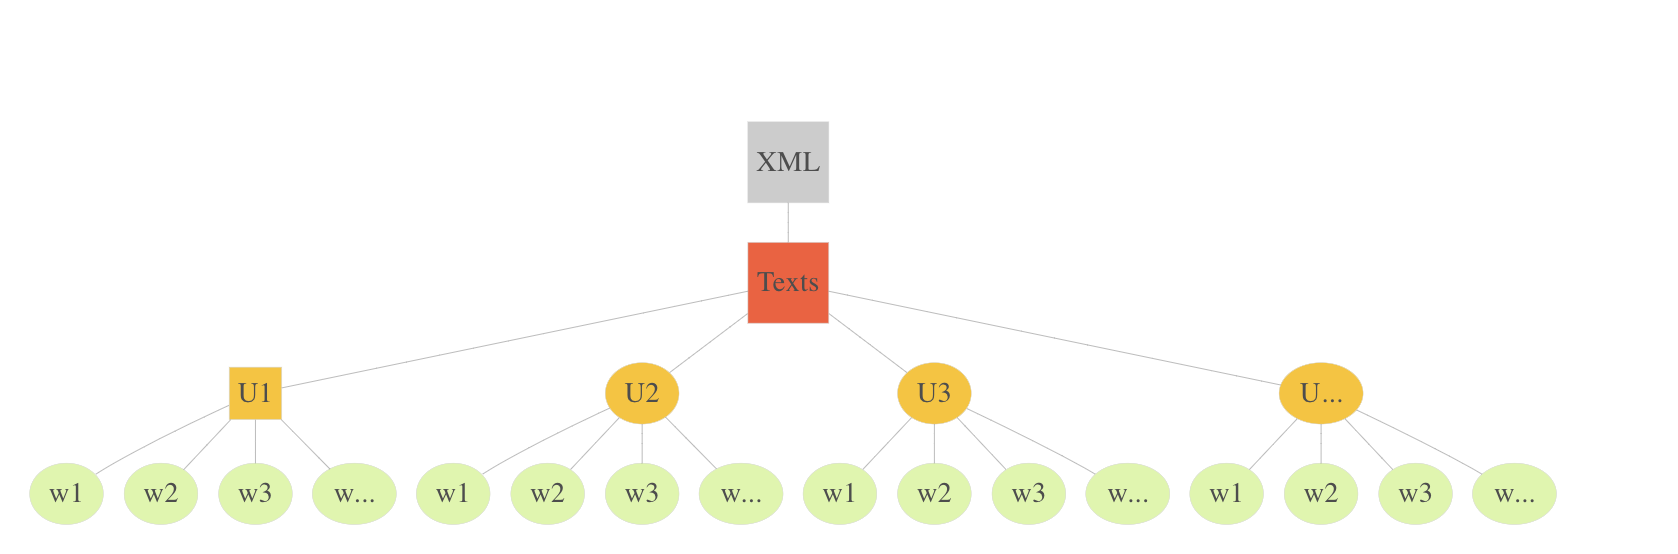

In [4]:
f_names = os.listdir(dir_corpus)
f_paths = [f"{dir_corpus}{f_name}" for f_name in f_names]

In [5]:
# f_names
# f_paths
len(f_paths)

1251

In [6]:
len(f_names)

1251

In [7]:
def get_xml(f_path):
    with open(f_path, 'r', encoding='utf-8') as f:
        f = f.read()
    xml = etree.fromstring(f)
    return xml


## OR Parse XML using Pandas inbuilt function
let's make use of the untagged version of the corpus as an additional example

I recommend taking a look at the structure of the xml files in order to understand what is happening below, I isolate the speaker and the u (for utterance) tags, however, you may wish to isolate additional tags.

From the code below you will be able to construct a dataframe containing the dialouge data in a format that makes sense for the assignment (hint: you should make sure you add the speaker info you want to analyse to the dialogue utterances and combine all the dialogues (with dialogue and speaker id) in one table so that you can analyse and filter the data in the same manner as in the dialogue corpus from the practicals) 

In [8]:
dir_corpus = path + '/spoken/untagged/'
print(dir_corpus)
f_names = os.listdir(dir_corpus)
f_paths = [f"{dir_corpus}{f_name}" for f_name in f_names]

for paths in f_paths: # for each of the dialogues
    print(paths)
    df_utts = pd.read_xml(paths, xpath="//u")
    df_speakers = pd.read_xml(paths, xpath="//speaker")
    break
#print(list(df))
df_speakers

Dataset/spoken/untagged/
Dataset/spoken/untagged/S23A.xml


,id,exactage,age1994,agerange,gender,nat,birthplace,birthcountry,l1,lingorig,...,dialect_l2,dialect_l3,dialect_l4,edqual,occupation,socgrade,nssec,l2,fls,in_core
0,S0021,27,25_34,19_29,F,British,Swindon,England,English,England,...,england,south,southwest,5_postgrad,Teacher,B,2,None,None,y
1,S0032,28,25_34,19_29,M,British,Yoevil,England,English,England,...,england,south,southwest,4_graduate,Software developer,A,1_2,None,None,y
2,S0094,33,25_34,30_39,F,British,Swindon,England,English,England,...,england,south,southwest,5_postgrad,PhD student,A,1_2,German,Welsh -- Beginner,y
3,S0095,33,25_34,30_39,M,British,Camarthen,Scotland,English,England,...,wales,wales,wales,5_postgrad,Self employed maker,E,uncat,None,None,y


# Corpus size

Texts: calculate the total number of texts in the corpus

In [ ]:
%%time
texts = []
for f_path in f_paths:
    xml = get_xml(f_path)
    id = xml.get('id')
    texts.append(id)

In [ ]:
# No of documents (texts) in the tagged directory of the corpus
len(texts)

1251

**Number of Speakers in the Corpus**

In [ ]:
speakers_words = defaultdict(int)
for f_path in f_paths:
    xml = get_xml(f_path)
    for u in xml.iter('u'):
        speaker = u.get('who')
        n_words = len([w for w in u.iter('w')])
        speakers_words[speaker] += n_words 
print(f'number of speakers: {len(speakers_words)}')

number of speakers: 671


**Words per speaker**

In [ ]:
df_speakers_words = pd.DataFrame(list(speakers_words.items()), columns=['speaker', 'n_words'])

In [ ]:
df_speakers_words.sort_values('speaker', ascending=True, inplace=True)

In [ ]:
df_speakers_words

,speaker,n_words
339,S0001,0
644,S0002,0
290,S0003,0
188,S0004,0
517,S0005,0
...,...,...
395,S0691,0
394,S0692,0
3,UNKFEMALE,0
4,UNKMALE,0


In [ ]:
#write the above dataframe to csv if required
df_speakers_words.to_csv(path + '/out/speakers_nwords.csv')

In [ ]:
#No. of words in the corpus

n_words = 0
for f_path in f_paths:
    xml = get_xml(f_path)
    for w in xml.iter('w'):
        n_words += 1
        
print(f'total number of words in the corpus: {n_words}')

total number of words in the corpus: 0


# Files from Metadata folder

In [ ]:
# =loading speakers txt file
head_speakers = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-speaker.txt'),
    delimiter='\t',
    skiprows=1,
    index_col=0
)

In [ ]:
head_speakers

,XML tag,Metadata Title
#,,
1,exactage,Exact age
2,age1994,Age (BNC1994 groups)
3,agerange,Age range
4,gender,Gender
5,nat,Nationality
6,birthplace,Place of birth
7,birthcountry,Country of birth
8,l1,First language
9,lingorig,Linguistic origin


In [ ]:
# loading speakerdata tsv file
speakers = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-speakerdata.tsv'), 
    delimiter='\t', 
    names=head_speakers['XML tag'],
    index_col=0
)

In [ ]:
speakers

,exactage,age1994,agerange,gender,nat,birthplace,birthcountry,l1,lingorig,dialect_rep,...,dialect_l2,dialect_l3,dialect_l4,edqual,occupation,socgrade,nssec,l2,fls,in_core
S0001,32,25_34,30_39,F,British,"Wordsley, West Midlands",England,English,England,None indicated,...,unspecified,unspecified,unspecified,5_postgrad,University researcher,A,1_2,NaN,NaN,n
S0002,NaN,Unknown,19_29,F,British,Birmingham,England,English,England,Midlands,...,england,midlands,unspecified,5_postgrad,Teacher,B,2,NaN,Japanese -- Intermediate,n
S0003,NaN,Unknown,19_29,F,British,"Royal Leamington Spa, Warwickshire",England,English,England,Northern,...,england,north,unspecified,4_graduate,Student,E,uncat,NaN,NaN,n
S0004,NaN,Unknown,30_39,M,British,NaN,Germany,English,England,Northern,...,england,north,unspecified,5_postgrad,Engineer,C2,5,NaN,Spanish -- Beginner,n
S0005,NaN,60plus,80_89,F,British,Birmingham,England,English,England,Midlands,...,england,midlands,unspecified,2_secondary,Insurance Broker (retired),E,8,NaN,French -- Beginner,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S0691,45,45_59,40_49,F,British,Barrow-In-Furness,UK,English,England,Northern/ Cumbrian,...,england,north,unspecified,3_sixthform,dental nurse (trainee),D,6,NaN,NaN,y
S0692,22,15_24,19_29,M,British,Barrow-in-Furness,England,English,England,Northern,...,england,north,unspecified,3_sixthform,Sales Assistant (Part time),D,6,NaN,NaN,n
UNKFEMALE,NaN,Unknown,Unknown,F,NaN,NaN,NaN,NaN,NaN,None indicated,...,unspecified,unspecified,unspecified,9_unknown,NaN,unknown,unknown,NaN,NaN,n
UNKMALE,NaN,Unknown,Unknown,M,NaN,NaN,NaN,NaN,NaN,None indicated,...,unspecified,unspecified,unspecified,9_unknown,NaN,unknown,unknown,NaN,NaN,n


In [ ]:
# Load text data

head_texts = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-text.txt'),
    delimiter='\t',
    skiprows=1,
    index_col=0
)

In [ ]:
head_texts

,XML tag,Metadata Title
#,,
1,rec_length,Recording length
2,rec_date,Recording date
3,rec_year,Year of recording
4,rec_period,Recording period
5,n_speakers,Number of speakers
6,list_speakers,List of speaker IDs
7,rec_loc,Recording location
8,relationships,Inter-speaker relationship
9,topics,Topics covered


In [ ]:
# Loading textdata from tsv file

texts = pd.read_csv(
    os.path.join(dir_meta,'bnc2014spoken-textdata.tsv'), 
    delimiter='\t', 
    names=head_texts['XML tag'],
    index_col=0
)

In [ ]:
texts

,rec_length,rec_date,rec_year,rec_period,n_speakers,list_speakers,rec_loc,relationships,topics,activity,conv_type,conventions,in_sample,transcriber
S23A,1:50:43,2014-12-27,2014,2014_Q4,4,S0021 S0032 S0094 S0095,Speakers' home,"Close family, partners, very close friends","Computer programming, food, wine, temperature,...",Catching up with family over food and presents,"Discussing, explaining, anecdote telling",Revised,n,T15
S24A,0:17:24,2014-09-12,2014,2014_Q3,2,S0261 S0262,"Modern Art Museum, London","Close family, partners, very close friends",The art,A couple discussing modern art at a museum,"Discussing, explaining, inquiring",Revised,y,T09
S24D,0:20:00,2016-01-14,2016,2016_Q1,3,S0653 S0654 S0655,"Home kitchen, Comberton","Close family, partners, very close friends","Lego Ninjago, Minecraft worlds",Spending time on electronic toys instead of re...,"Discusing, explaining",Revised,n,T18
S24E,0:45:53,2015-09-15,2015,2015_Q3,3,S0519 S0520 S0521,"Hunsonby, Cumbria","Close family, partners, very close friends","food, exercise, choir, family plans, family me...",Midweek family dinner,"Discussing, explaining, Inquiring, advising, a...",Revised,n,T09
S263,2:00:00,2016-02-07,2016,2016_Q1,4,S0588 S0589 S0590 S0616,ANON’s home,"Close family, partners, very close friends",NaN,NaN,"Discussing, explaining",Revised,n,T10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SZVB,1:00:31,2015-11-02,2015,2015_Q4,2,S0517 S0525,"(ANON’s home, Fradley, Staffs)","Close family, partners, very close friends","Babies, family, friends",Sisters talking about their family (new baby d...,"Discussing, explaining, inquiring, anecdote te...",Revised,n,T15
SZVC,0:32:00,2015-09-14,2015,2015_Q3,2,S0324 S0325,"ANON's home, Linton","Close family, partners, very close friends","school orchestra (windband), Playing the Clari...",Friends talking about school,"discussing, explaining, inquiring, complaining...",Revised,n,T10
SZW4,0:21:09,2015-10-19,2015,2015_Q4,2,S0509 S0510,"ANON & ANON's home, Hastings","Close family, partners, very close friends","Poetry, Morning Routine, Food, Social Events, ...",Mother and Daughter,"Discussing, inquiring, anecdote telling",Revised,n,T18
SZXQ,0:40:44,2012-03-21,2012,2012_Q1,2,S0058 S0120,"Botanic Gardens, Cambridge","Friends, wider family circle","TV, languages, friends, holidays, offices, comedy",NaN,"Discussing, explaining, inquiring, complaining...",Original,y,T11


In [ ]:
import pandas as pd
import os

# base metadata dir
dir_meta = os.path.join(path, 'spoken', 'metadata')

# load field‐name lookups
fields_s = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-speaker.txt'),
    sep='\t', skiprows=1, index_col=0
)
fields_t = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-text.txt'),
    sep='\t', skiprows=1, index_col=0
)

# load the speaker metadata (indexed by speaker_id)
df_speakers_meta = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-speakerdata.tsv'),
    sep='\t', names=fields_s['XML tag'], index_col=0
)

# load the text/session metadata (indexed by text_id)
df_texts_meta = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-textdata.tsv'),
    sep='\t', names=fields_t['XML tag'], index_col=0
)

In [ ]:
import os
import pandas as pd
import lxml.etree as ET


path         = 'Dataset'  # change if needed
dir_tagged   = os.path.join(path, 'spoken', 'tagged')
dir_untagged = os.path.join(path, 'spoken', 'untagged')

In [ ]:
tagged_rows = []
for fname in os.listdir(dir_tagged):
    fpath = os.path.join(dir_tagged, fname)
    xml   = ET.parse(fpath)
    root  = xml.getroot()
    text_id = root.get('id')
    for u in root.findall('.//u'):
        # use the "n" attribute on <u> as your utterance ID
        utt_id = u.get('n')
        spk    = u.get('who')
        for w in u.findall('w'):
            tagged_rows.append({
                'text_id'     : text_id,
                'utterance_id': utt_id,
                'speaker_id'  : spk,
                'word'        : w.text,
                'lemma'       : w.get('lemma'),
                'pos'         : w.get('pos'),
                'class'       : w.get('class'),
                'usas'        : w.get('usas'),
            })

df_tagged = pd.DataFrame(tagged_rows)
print("Tagged (word-level) with correct utterance IDs:")
print(df_tagged.head())


Tagged (word-level) with correct utterance IDs:
  text_id utterance_id speaker_id   word lemma   pos  class  usas
0    S23A            1      S0094  words  word   NN2  SUBST    Q3
1    S23A            2      S0095     it    it  PPH1   PRON    Z8
2    S23A            2      S0095     's    be   VBZ   VERB    A3
3    S23A            2      S0095      a     a   AT1    ART    Z5
4    S23A            2      S0095  games  game   NN2  SUBST  K5:1


In [ ]:
df_tagged

,text_id,utterance_id,speaker_id,word,lemma,pos,class,usas
0,S23A,1,S0094,words,word,NN2,SUBST,Q3
1,S23A,2,S0095,it,it,PPH1,PRON,Z8
2,S23A,2,S0095,'s,be,VBZ,VERB,A3
3,S23A,2,S0095,a,a,AT1,ART,Z5
4,S23A,2,S0095,games,game,NN2,SUBST,K5:1
...,...,...,...,...,...,...,...,...
11262882,SZYV,320,S0432,mm,mm,UH,INTERJ,Z4
11262883,SZYV,320,S0432,yeah,yeah,UH,INTERJ,Z4
11262884,SZYV,320,S0432,we,we,PPIS2,PRON,Z8
11262885,SZYV,320,S0432,probably,probably,RR,ADV,A7


In [ ]:
# 1. build df_untagged as before…
untagged_rows = []
for fname in os.listdir(dir_untagged):
    fpath = os.path.join(dir_untagged, fname)
    xml   = ET.parse(fpath)
    root  = xml.getroot()
    text_id = root.get('id')
    for u in root.findall('.//u'):
        raw = ''.join(u.itertext()).strip()
        untagged_rows.append({
            'text_id'     : text_id,
            'utterance_id': u.get('n') or u.get('uID'),
            'speaker_id'  : u.get('who'),
            'raw_text'    : raw,
        })

df_untagged = pd.DataFrame(untagged_rows)

# 2. now add utterance length
df_untagged['utt_length'] = df_untagged['raw_text'].str.split().str.len()

# 3. you can verify it exists
print(df_untagged[['raw_text','utt_length']].head())


                                            raw_text  utt_length
0                                              words           1
1     it's a games word? like a computer games word?           9
2                                          yeah yeah           2
3                                  oh oh that's nice           4
4  I it's something I have really heard z-buffer ...          13


In [ ]:
df_untagged

,text_id,utterance_id,speaker_id,raw_text,utt_length
0,S23A,1,S0094,words,1
1,S23A,2,S0095,it's a games word? like a computer games word?,9
2,S23A,3,S0032,yeah yeah,2
3,S23A,4,S0095,oh oh that's nice,4
4,S23A,5,S0032,I it's something I have really heard z-buffer ...,13
...,...,...,...,...,...
1248105,SZYV,316,S0432,but anyway erm he was like Sha Li that's rea...,29
1248106,SZYV,317,S0428,no I'm quite happy with Sha Li,7
1248107,SZYV,318,S0432,I'll just stick with it yeah this was like ha...,34
1248108,SZYV,319,S0428,yeah got to change my name that's crazy isn't...,14


In [ ]:
df_untagged['utt_length'] = df_untagged['raw_text'].str.split().str.len()


In [ ]:
df_untagged

,text_id,utterance_id,speaker_id,raw_text,utt_length
0,S23A,1,S0094,words,1
1,S23A,2,S0095,it's a games word? like a computer games word?,9
2,S23A,3,S0032,yeah yeah,2
3,S23A,4,S0095,oh oh that's nice,4
4,S23A,5,S0032,I it's something I have really heard z-buffer ...,13
...,...,...,...,...,...
1248105,SZYV,316,S0432,but anyway erm he was like Sha Li that's rea...,29
1248106,SZYV,317,S0428,no I'm quite happy with Sha Li,7
1248107,SZYV,318,S0432,I'll just stick with it yeah this was like ha...,34
1248108,SZYV,319,S0428,yeah got to change my name that's crazy isn't...,14


In [ ]:
# %pip install ace-tools
# %pip install tools

In [ ]:
import lxml.etree as ET
# 

In [ ]:
# 5. Compute per-variable metrics
metrics = {}

# Speaker birth_year if available
if 'birth_year' in df_speakers_meta.columns:
    ages = df_speakers_meta['birth_year']
    metrics['birth_year'] = ages

# Utterance length
metrics['utterance_length'] = df_untagged['utt_length']

# Number of utterances per speaker
num_utt_spk = df_untagged.groupby('speaker_id').size()
metrics['num_utterances_per_speaker'] = num_utt_spk

# Average utterance length per speaker
avg_utt_len_spk = df_untagged.groupby('speaker_id')['utt_length'].mean()
metrics['avg_utt_length_per_speaker'] = avg_utt_len_spk

# Number of utterances per text
num_utt_text = df_untagged.groupby('text_id').size()
metrics['num_utterances_per_text'] = num_utt_text

# Number of tokens per text
num_tok_text = df_tagged.groupby('text_id').size()
metrics['num_tokens_per_text'] = num_tok_text

# Number of participants field
if 'n_participants' in df_texts_meta.columns:
    metrics['n_participants'] = df_texts_meta['n_participants']

# Number of unique speakers per text
n_spk_text = df_untagged.groupby('text_id')['speaker_id'].nunique()
metrics['num_speakers_per_text'] = n_spk_text

In [ ]:
rows = []
for var, series in metrics.items():
    desc = series.describe(percentiles=[.25, .5, .75]).to_dict()
    rng = desc.get('max', np.nan) - desc.get('min', np.nan)
    rows.append({
        'variable': var,
        'count': desc.get('count'),
        'mean': desc.get('mean'),
        'std': desc.get('std'),
        'min': desc.get('min'),
        '25%': desc.get('25%'),
        '50%': desc.get('50%'),
        '75%': desc.get('75%'),
        'max': desc.get('max'),
        'range': rng
    })

summary_df = pd.DataFrame(rows).set_index('variable')

In [ ]:
summary_df

,count,mean,std,min,25%,50%,75%,max,range
variable,,,,,,,,,
utterance_length,1248110.0,8.262278,12.160940,0.000000,1.000000,5.000000,10.000000,959.000000,959.000000
num_utterances_per_speaker,671.0,1860.074516,3733.505989,4.000000,241.500000,588.000000,1775.000000,40172.000000,40168.000000
avg_utt_length_per_speaker,671.0,9.020567,5.661610,0.096044,6.280594,7.991911,10.273756,84.384615,84.288571
num_utterances_per_text,1251.0,997.689848,952.302271,67.000000,417.500000,712.000000,1299.500000,16574.000000,16507.000000
num_tokens_per_text,1251.0,9003.107114,7598.839569,819.000000,4090.500000,6848.000000,11818.500000,126767.000000,125948.000000
num_speakers_per_text,1251.0,3.833733,1.693615,2.000000,3.000000,3.000000,5.000000,15.000000,13.000000


In [ ]:
print(df_speakers_meta.columns.tolist())

['exactage', 'age1994', 'agerange', 'gender', 'nat', 'birthplace', 'birthcountry', 'l1', 'lingorig', 'dialect_rep', 'hab_city', 'hab_country', 'hab_dur', 'dialect_l1', 'dialect_l2', 'dialect_l3', 'dialect_l4', 'edqual', 'occupation', 'socgrade', 'nssec', 'l2', 'fls', 'in_core']


In [ ]:
# 1. Merge agerange into your utterance-level DataFrame
df_utt_meta = (
    df_untagged
      .merge(df_speakers_meta[['agerange']],
             left_on='speaker_id', right_index=True, how='left')
)

# 2. Compute descriptive stats of utterance length by age-range
desc_utt_by_age = (
    df_utt_meta
      .groupby('agerange')['utt_length']
      .describe(percentiles=[.25, .5, .75])
)
print("=== Utterance Length by Age Range ===")
print(desc_utt_by_age)


# 3. Build your speaker-level metrics DataFrame (if you haven’t already)
speaker_metrics = pd.DataFrame({
    'num_utterances'    : num_utt_spk,
    'avg_utt_length'    : avg_utt_len_spk
}).merge(
    df_speakers_meta[['agerange']],
    left_index=True, right_index=True, how='left'
)

# 4. Compute descriptive stats of speaker metrics by age-range
desc_spk_by_age = (
    speaker_metrics
      .groupby('agerange')[['num_utterances','avg_utt_length']]
      .describe(percentiles=[.25, .5, .75])
)
print("\n=== Speaker Metrics by Age Range ===")
print(desc_spk_by_age)


=== Utterance Length by Age Range ===
             count      mean        std  min  25%  50%   75%    max
agerange                                                           
0_10       24985.0  5.206684   6.804091  0.0  1.0  3.0   7.0  124.0
11_18      79386.0  7.902023  11.135085  0.0  2.0  5.0  10.0  861.0
19_29     430577.0  8.774247  12.564791  0.0  2.0  5.0  11.0  595.0
30_39     176851.0  8.484905  11.448897  0.0  2.0  5.0  11.0  561.0
40_49     166604.0  8.853461  13.473389  0.0  1.0  5.0  11.0  431.0
50_59     125670.0  8.370669  12.358150  0.0  1.0  5.0  10.0  428.0
60_69     116865.0  8.289993  12.258378  0.0  1.0  5.0  10.0  656.0
70_79      72511.0  7.198480  11.761806  0.0  1.0  4.0   9.0  959.0
80_89      15090.0  7.205567  10.842049  0.0  1.0  4.0   9.0  242.0
90_99      10178.0  7.472784   9.729479  0.0  1.0  5.0  10.0  209.0
Unknown    29393.0  2.508999   6.268407  0.0  0.0  0.0   2.0  188.0

=== Speaker Metrics by Age Range ===
         num_utterances                 

In [ ]:
# Load speaker metadata
fields_s = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-speaker.txt'),
    sep='\t', skiprows=1, index_col=0
)
df_speakers_meta = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-speakerdata.tsv'),
    sep='\t', names=fields_s['XML tag'], index_col=0
)

# Build utterance-level DataFrame
rows = []
for fname in os.listdir(dir_untagged):
    fpath = os.path.join(dir_untagged, fname)
    xml = ET.parse(fpath)
    root = xml.getroot()
    text_id = root.get('id')
    for u in root.findall('.//u'):
        raw_text = ''.join(u.itertext()).strip()
        rows.append({
            'text_id': text_id,
            'utterance_id': u.get('n') or u.get('uID'),
            'speaker_id': u.get('who'),
            'utt_length': len(raw_text.split())
        })
df_utt = pd.DataFrame(rows)

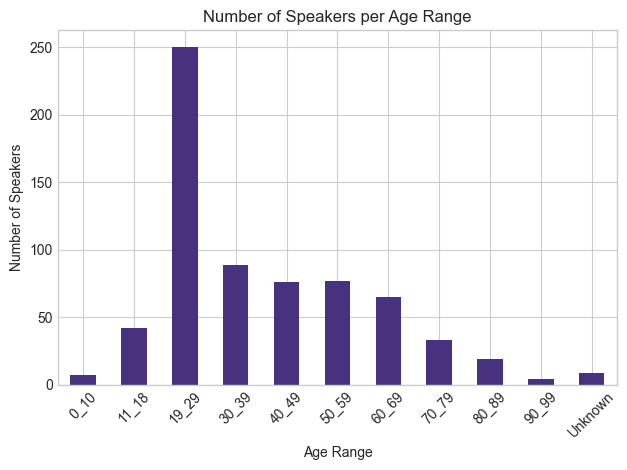

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_speakers_meta is already in your environment
# Count the number of speakers in each age range
age_counts = df_speakers_meta['agerange'].value_counts().sort_index()

# Plot bar chart
plt.figure()
age_counts.plot(kind='bar')
plt.title('Number of Speakers per Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Speakers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


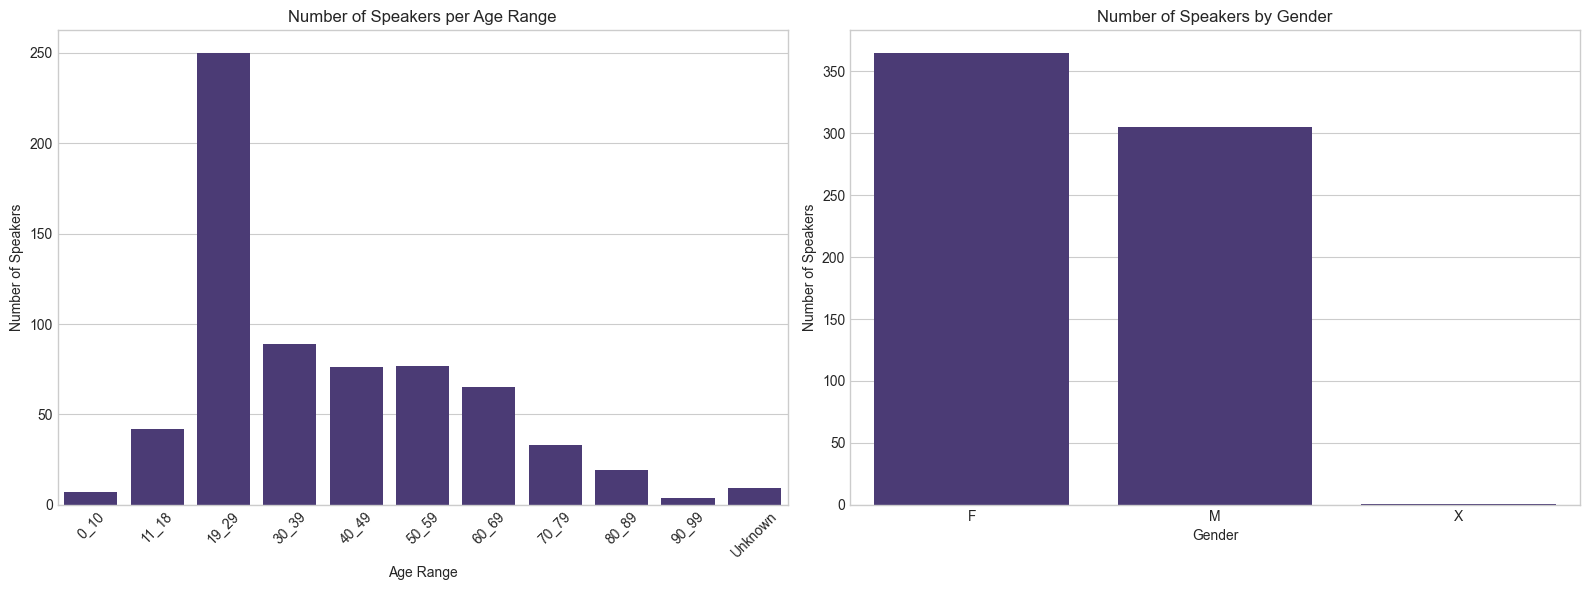

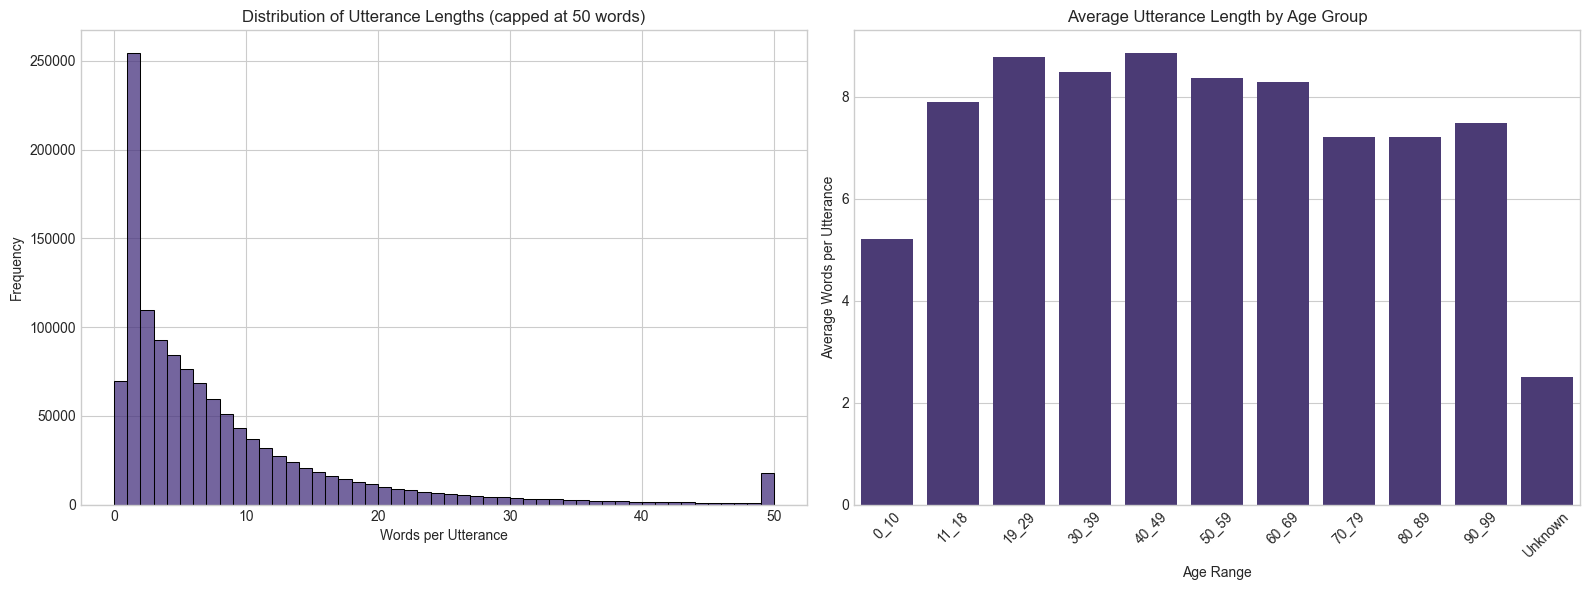

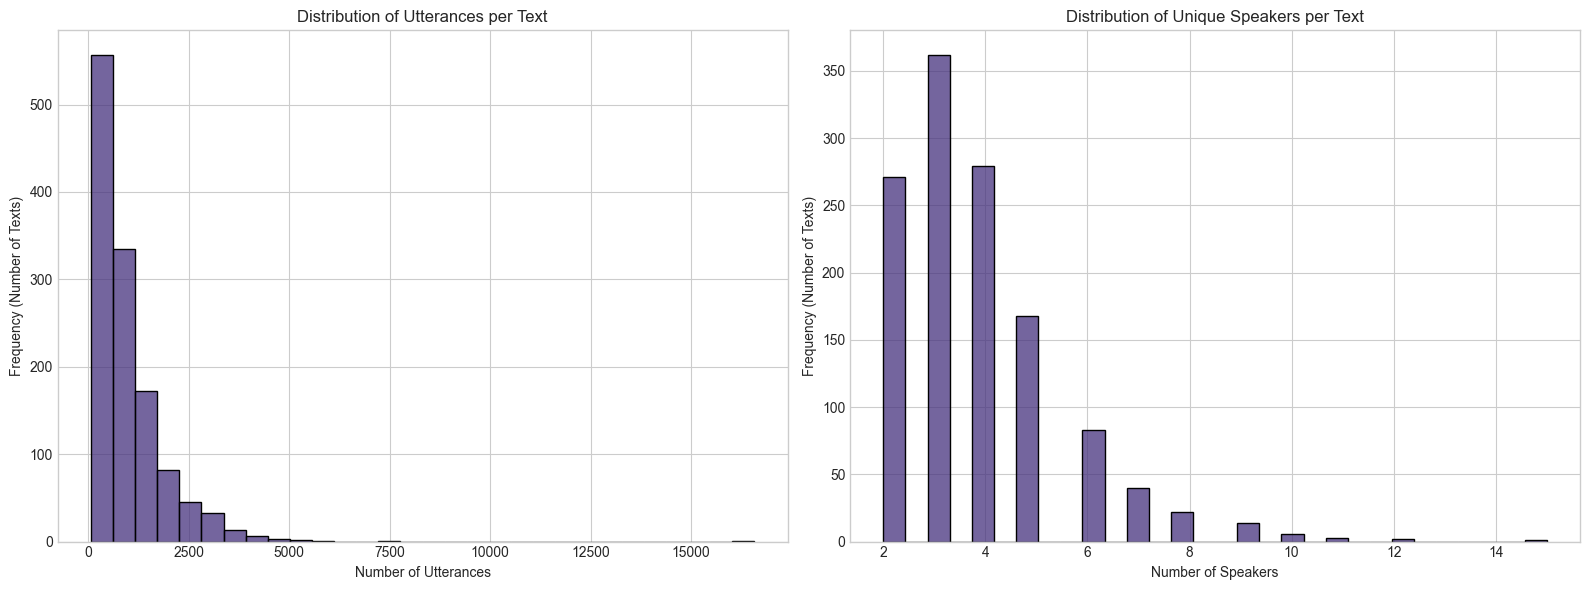

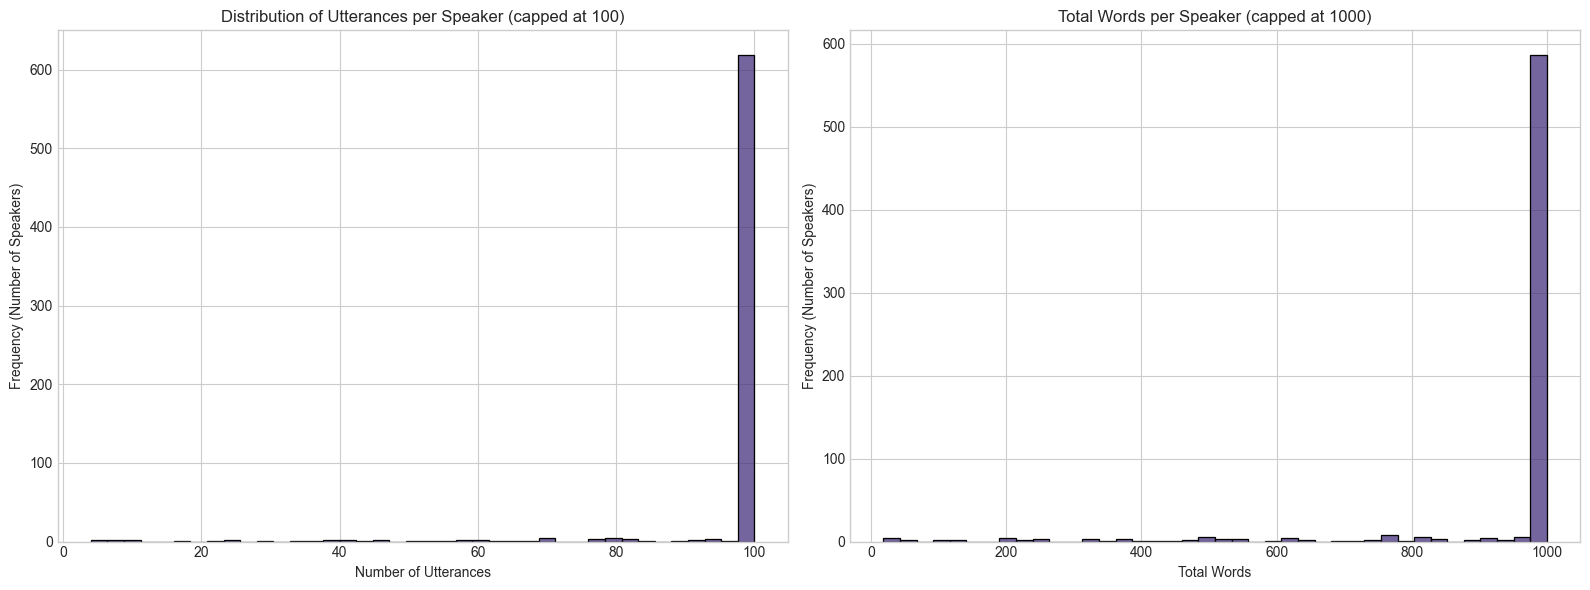

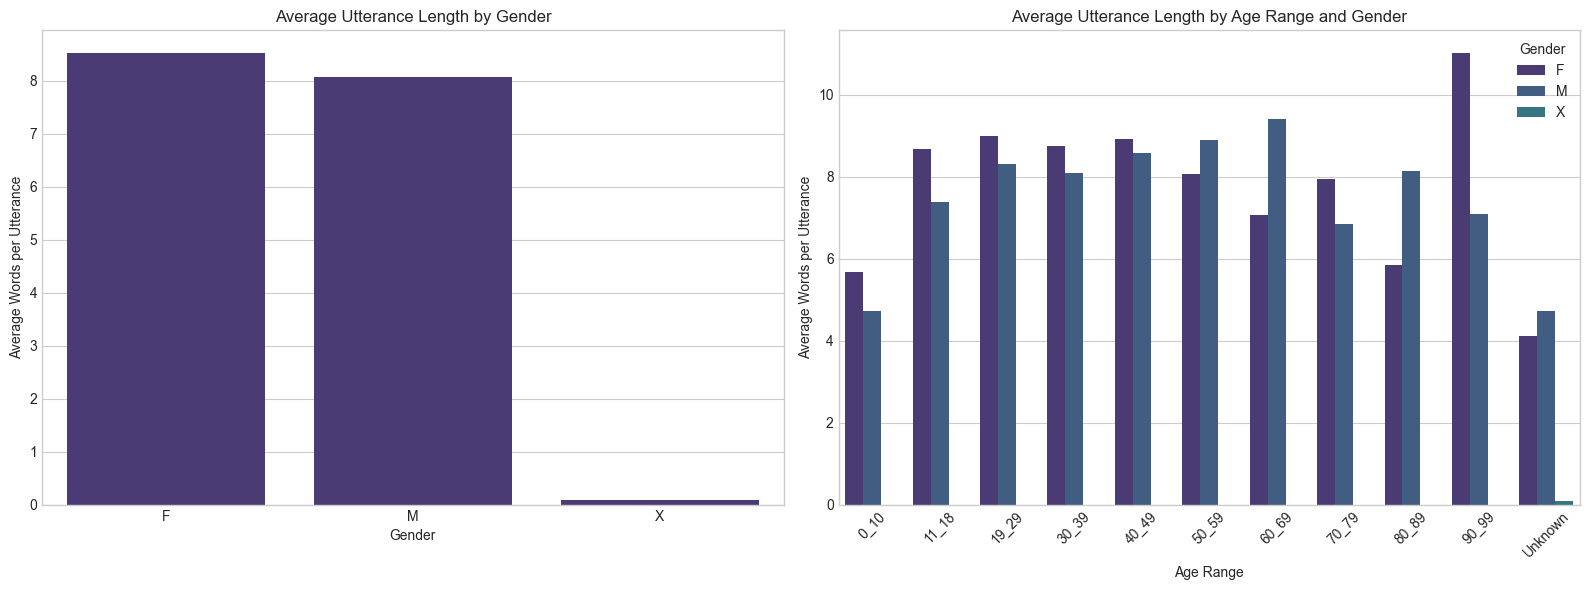

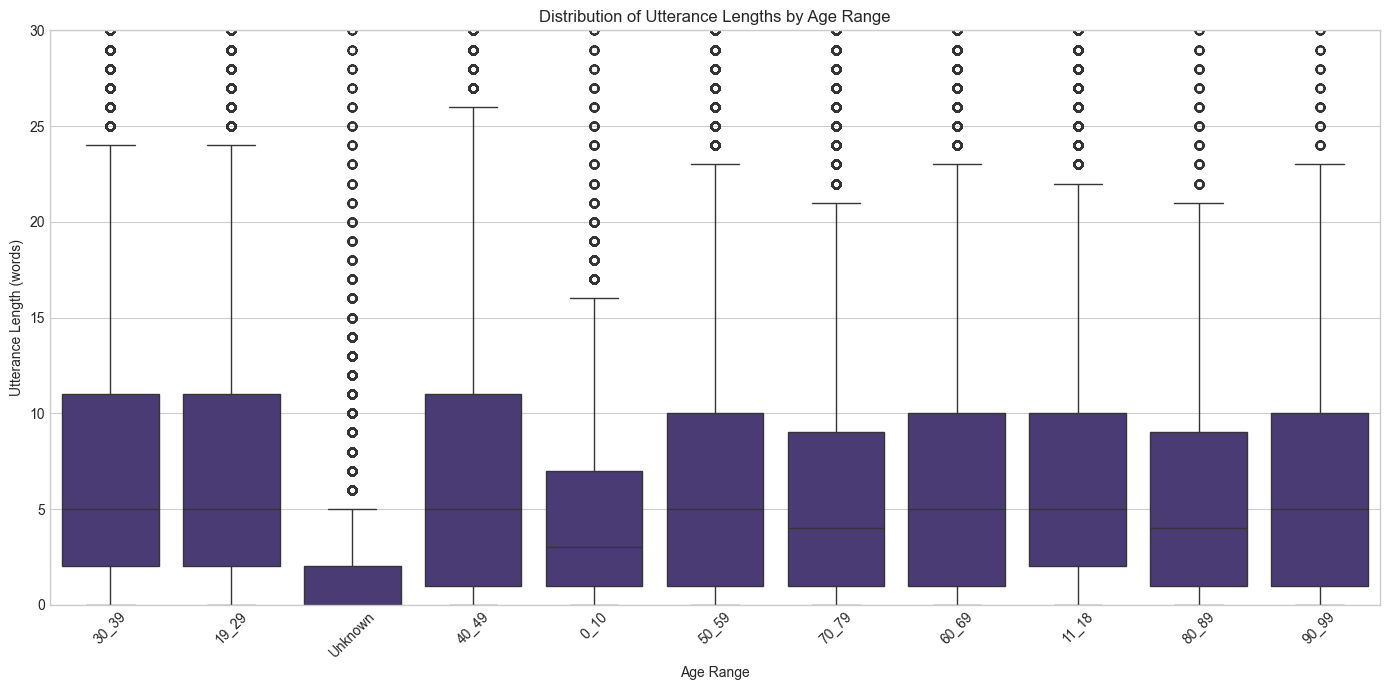

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# 1. Speaker Demographics - Age and Gender Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Age Range Distribution
age_counts = df_speakers_meta['agerange'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, ax=ax1)
ax1.set_title('Number of Speakers per Age Range')
ax1.set_xlabel('Age Range')
ax1.set_ylabel('Number of Speakers')
ax1.tick_params(axis='x', rotation=45)

# Gender Distribution
gender_counts = df_speakers_meta['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax2)
ax2.set_title('Number of Speakers by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Speakers')

plt.tight_layout()
plt.show()

# 2. Utterance Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Distribution of utterance lengths
sns.histplot(df_utt['utt_length'].clip(0, 50), bins=50, ax=ax1)
ax1.set_title('Distribution of Utterance Lengths (capped at 50 words)')
ax1.set_xlabel('Words per Utterance')
ax1.set_ylabel('Frequency')

# Average utterance length by age group
df_utt_with_age = df_utt.merge(
    df_speakers_meta[['agerange']], 
    left_on='speaker_id', 
    right_index=True, 
    how='left'
)
avg_utt_by_age = df_utt_with_age.groupby('agerange')['utt_length'].mean().sort_index()
sns.barplot(x=avg_utt_by_age.index, y=avg_utt_by_age.values, ax=ax2)
ax2.set_title('Average Utterance Length by Age Group')
ax2.set_xlabel('Age Range')
ax2.set_ylabel('Average Words per Utterance')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Text-level Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Number of utterances per text
utterances_per_text = df_utt.groupby('text_id').size()
sns.histplot(utterances_per_text, bins=30, ax=ax1)
ax1.set_title('Distribution of Utterances per Text')
ax1.set_xlabel('Number of Utterances')
ax1.set_ylabel('Frequency (Number of Texts)')

# Number of speakers per text
speakers_per_text = df_utt.groupby('text_id')['speaker_id'].nunique()
sns.histplot(speakers_per_text, bins=30, ax=ax2)
ax2.set_title('Distribution of Unique Speakers per Text')
ax2.set_xlabel('Number of Speakers')
ax2.set_ylabel('Frequency (Number of Texts)')

plt.tight_layout()
plt.show()



# 5. Gender and Age Analysis of Language Use
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Combine age, gender and utterance data
df_combined = df_utt.merge(
    df_speakers_meta[['agerange', 'gender']], 
    left_on='speaker_id', 
    right_index=True, 
    how='left'
)

# Average utterance length by gender
avg_utt_by_gender = df_combined.groupby('gender')['utt_length'].mean()
sns.barplot(x=avg_utt_by_gender.index, y=avg_utt_by_gender.values, ax=ax1)
ax1.set_title('Average Utterance Length by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Average Words per Utterance')

# Average utterance length by age range and gender
avg_by_age_gender = df_combined.groupby(['agerange', 'gender'])['utt_length'].mean().reset_index()
sns.barplot(x='agerange', y='utt_length', hue='gender', data=avg_by_age_gender, ax=ax2)
ax2.set_title('Average Utterance Length by Age Range and Gender')
ax2.set_xlabel('Age Range')
ax2.set_ylabel('Average Words per Utterance')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Gender')

plt.tight_layout()
plt.show()

# 6. Correlation Heatmap for Numeric Variables
# Get numeric columns from speaker metadata
numeric_cols = df_speakers_meta.select_dtypes(include=[np.number]).columns.tolist()

if numeric_cols:
    # Create correlation matrix
    corr = df_speakers_meta[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numeric Speaker Variables')
    plt.tight_layout()
    plt.show()

